In [1]:
using FFTW,  DifferentialEquations, PlutoUI

In [8]:
ν = 0.001;   # Diffusion constant

# Define spatial domain
L = 20             # Length of domain 
N = 1000           # Number of discretization points
Δx = L/N
x = range(-L/2, step=Δx, length = N) # Define x domain

# Define discrete wavenumbers
κ = 2 * π * fftfreq(N, 1/Δx)

# Initial condition
u₀ = sech.(x)

# Simulate PDE in spatial domain
Δt = 0.025; t = range(-L/2, step=Δx, length = 101)

-10.0:0.02:-8.0

In [22]:
function rhs_Burgers(u, param, tspan) 
    ν, κ = param # unpack parameters
    û = fft(u)
    ûₓ = im .* κ .* û   
    # Note that subscript ₓ is just a unicode character, 
    # which is part the variable name and is not a command
    ûₓₓ = - κ.^2 .* û 
    uₓ = ifft(ûₓ) 
    uₓₓ = ifft(ûₓₓ) 
    return -u .* real(uₓ) .+ ν .* real(uₓₓ)
end

rhs_Burgers (generic function with 1 method)

In [23]:
param = (ν, κ)
tspan = (t[1],t[end])
prob = ODEProblem(rhs_Burgers, u₀, tspan, param)  # Define the ODE model

sol = solve(prob, DP5(), reltol=1e-5, saveat=t); # DP5() is the algorithm of ODE45

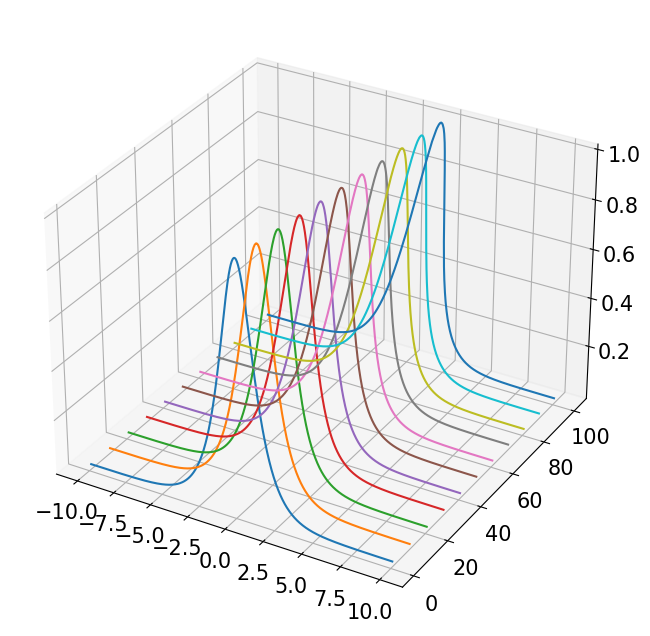

In [24]:
import PyCall  
# using PyCall allows to simply call the functions in PyCall; 
# import mean I need to refer to it via PyCall.<function>

# Get PyPlot and refer to function in the library via plt.<function>
import PyPlot; const plt = PyPlot 
rcParams = PyCall.PyDict(plt.matplotlib["rcParams"])
rcParams["font.size"] = 15
rcParams["figure.figsize"] = [8, 8]

plt.close("all")
for j in range(1, length(t), step=10)
    y = j * ones(N)
    plt.plot3D(x, y, sol[j])
end

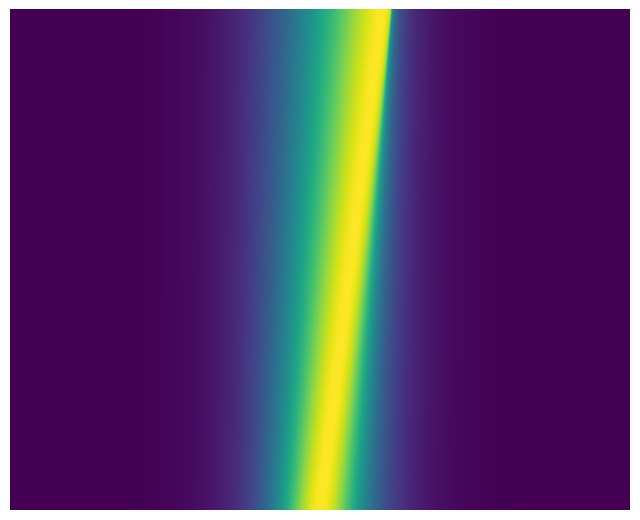

(-0.5, 999.5, 100.5, -0.5)

In [25]:
plt.close("all")
u_flipped = reverse(Array(sol), dims=2)'
plt.imshow(u_flipped, aspect=8)
plt.axis("off")

In [27]:
import Plots
# import Plots keeps the namespace somewhat cleaner than using Plots
# I need to refer to its functions via Plots.<function>
idx(value, range) = findfirst(isequal(value),range)
z = Plots.Surface( (xᵢ,tⱼ)->sol[idx(tⱼ,t)][idx(xᵢ,x)], x, t )
Plots.plotly()   # allows for some change of perspective
Plots.surface(x,t,z, xlabel="x", ylabel="t", size = (width=800, height=800))

<!DOCTYPE html>
 
 
 Plots.jl